In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import requests, json
from bs4 import BeautifulSoup, Comment

In [3]:
from textblob import TextBlob

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [5]:
URL = 'https://www.gutenberg.org/files/2500/2500-h/2500-h.htm'

In [6]:
def is_comment(element): 
    return isinstance(element, Comment)

In [7]:
def get_book(url):
    r = requests.get(url)
    r.encoding = 'utf-8'
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup.text

In [8]:
text = get_book(URL)

In [9]:
cv = CountVectorizer(stop_words='english')
frequencia = cv.fit_transform([text]).toarray()[0]
palavras = cv.get_feature_names()

In [10]:
df = pd.DataFrame()
df['palavras'] = palavras
df['frequencia'] = frequencia

In [11]:
df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,3757,3758,3759,3760,3761,3762,3763,3764,3765,3766
palavras,000,0em,10,100,10px,15,1500,1887,1em,20,...,yes,yesterday,yoga,young,younger,youth,zeal,zealous,zealously,zip
frequencia,1,1,4,1,1,2,1,1,1,2,...,20,12,1,41,3,11,1,1,1,1


In [12]:
df = df.sort_values(by='frequencia', ascending=False)
df.head()

,palavras,frequencia
2978,siddhartha,410
1459,govinda,147
1921,like,139
3366,time,139
2766,river,111


In [13]:
n = 15
df = df.iloc[:15]

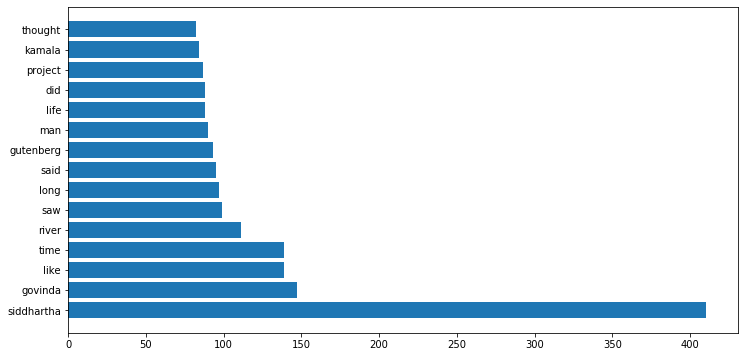

In [14]:
plt.figure(figsize=(12,6))
plt.barh(df['palavras'], df['frequencia'])
plt.show()

In [15]:
blob = TextBlob(text)

In [16]:
contagem ={}
for tag in blob.tags:
    pos_tag = tag[1]
    if pos_tag in contagem:
        contagem[pos_tag] += 1
    else:
        contagem[pos_tag] = 1

In [17]:
contagem

{'NNP': 1738,
 'IN': 4987,
 'NN': 6080,
 'JJ': 2476,
 'CD': 343,
 'FW': 4,
 'VB': 1685,
 'DT': 4503,
 'NNS': 1666,
 'VBP': 803,
 'CC': 1866,
 'VBD': 3003,
 'JJR': 98,
 'MD': 520,
 'VBZ': 626,
 'RB': 2734,
 'PRP': 3612,
 'VBN': 1287,
 'VBG': 856,
 'TO': 1224,
 'PRP$': 1208,
 'WRB': 333,
 'RP': 130,
 'PDT': 39,
 'POS': 164,
 'WP': 251,
 'NNPS': 27,
 'JJS': 65,
 'RBS': 23,
 'WDT': 231,
 'EX': 90,
 'WP$': 10,
 'RBR': 78,
 'UH': 55}

In [18]:
pos_df = pd.DataFrame.from_dict(contagem.items())

In [19]:
pos_df.columns = ['POS', 'frequencia']

In [20]:
pos_df = pos_df.sort_values(by='frequencia', ascending=False)

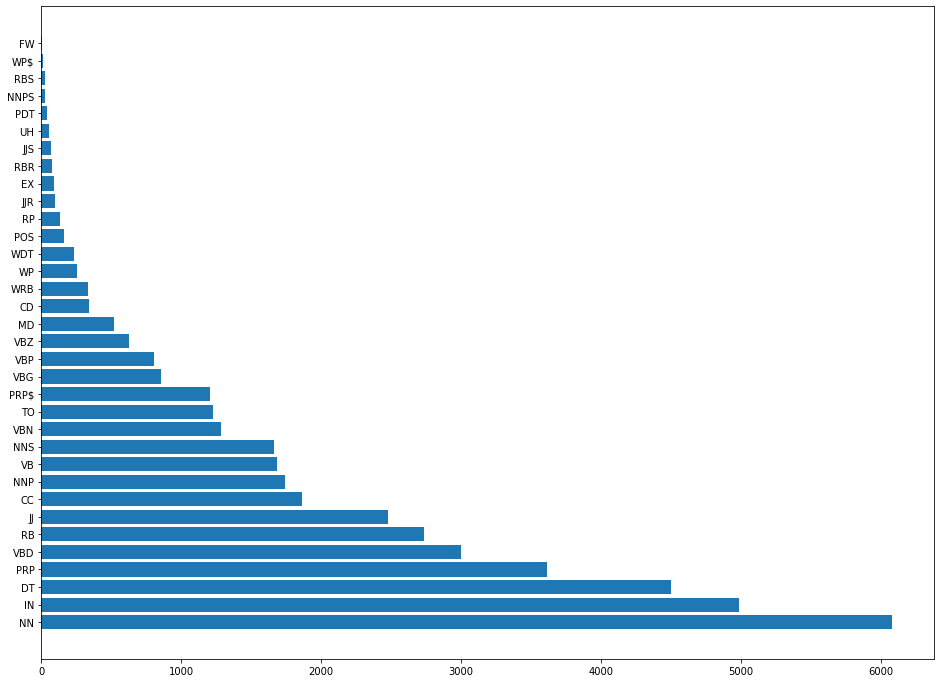

In [21]:
plt.figure(figsize=(16,12))
plt.barh(pos_df['POS'], pos_df['frequencia'])
plt.show()

In [22]:
blob.sentiment

Sentiment(polarity=0.15414475583326856, subjectivity=0.5049742465029657)

In [23]:
frases = [elemento for elemento in text.split('\n') if elemento != '' and elemento != '\r']

In [24]:
sentiments = []
for frase in frases:
    blob = TextBlob(frase)
    pol = blob.sentiment.subjectivity
    sentiments.append(pol)

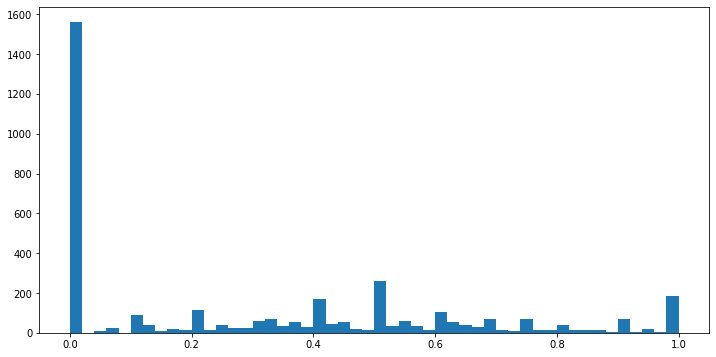

In [25]:
plt.figure(figsize=(12,6))
plt.hist(sentiments, bins=50)
plt.show()

In [26]:
URL2 = 'https://raw.githubusercontent.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection/master/Sarcasm_Headlines_Dataset.json'

In [27]:
def get_json(url):
    r = requests.get(url)
    r.encoding = 'utf-8'
    jsons = r.text.split('\r\n')
    jsons = [json.loads(ji) for ji in jsons if ji != '']
    return jsons

In [28]:
sarcasm = get_json(URL2)

In [29]:
sarcasm_df = pd.DataFrame.from_dict(sarcasm)

In [30]:
headlines = [headline for headline in sarcasm_df['headline']]
headlines[:5]

['thirtysomething scientists unveil doomsday clock of hair loss',
 'dem rep. totally nails why congress is falling short on gender, racial equality',
 'eat your veggies: 9 deliciously different recipes',
 'inclement weather prevents liar from getting to work',
 "mother comes pretty close to using word 'streaming' correctly"]

In [31]:
linhas = cv.fit_transform(sarcasm_df['headline']).toarray()

In [32]:
df2 = pd.DataFrame(linhas)
df2.columns = cv.get_feature_names()

In [33]:
sentiments = []
for headline in headlines:
    blob = TextBlob(headline)
    pol = blob.sentiment.subjectivity
    sentiments.append(pol)

In [34]:
sentiments[:5]

[0.0, 0.525, 0.6, 0.0, 1.0]

In [35]:
len(sentiments)

28619

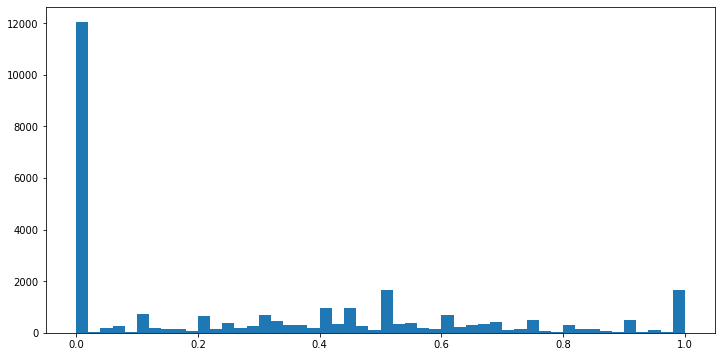

In [36]:
plt.figure(figsize=(12,6))
plt.hist(sentiments, bins=50)
plt.show()